Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **43 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Nahom Agize"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomly built BSTs

## Part A. Average number of comparisons when searching

## Question 0 [time estimate: 1 minute] 

Paste in the working code from last session's PCW for the class Node, which contains the methods for insertion, searching, and deletion. 



In [82]:
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        """inserts a node into a *non-empty* tree rooted at the node, returns
        the root"""
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def minimum(self):
        node = self
        while node.l_child != None:
            node = node.l_child
        return node
    
    def search(root, value):
        """searches a tree rooted at root for a node with data = value, returns the node if found, None otherwise"""
        #same as the textbook implementation
        #if value is smaller than current root value, search left subtree
        #otherwise search right subtree
        while root!=None and value!=root.data:
            if value<root.data:
                root=root.l_child
            else:
                root=root.r_child
        return root    

    def search_data(self, value):
        """searches a *non-empty* tree rooted at the node for a node with
        data = value, returns the value if found, None otherwise"""
        node = self.search(value)
        if node:
            return node.data
        else:
            return node
        
    def to_string(self): 
        print('self.data', self.data)
        root=self
        if not root: 
            return 'Nil'
        else: 
            r = root.r_child.to_string() if root.r_child else 'Nil'
            l = root.l_child.to_string() if root.l_child else 'Nil'
        return 'Node(' + str(root.data) + ' L: ' + l + ' R: ' + r + ')'
    def transplant(root,node,replace):
        #transplant procedure as described in textbook
        node1 = node
        node2 = replace
        if node1.parent == None:
            root = node2
        elif node1 == node1.parent.l_child:
            node1.parent.l_child = node2
        else:
            node1.parent.r_child = node2
        if node2 != None:
            node2.parent = node1.parent

    def tree_minimum(node):
        while node.l_child:
            node = node.l_child
        return node
    
    def delete(root, value):
        """if a node with data = value is present in the tree rooted at root, deletes that node and returns the root"""
        node = root.search(value)
        #search for the node
        if node:
            if node.l_child==None:
                root.transplant(node,node.r_child)
            elif node.r_child==None:
                root.transplant(node,node.l_child)
            else:
                successor = tree_minimum(node.r_child) #define the successor as the minimum node in right subtree
                if successor.parent != node:
                    root.transplant(successor,successor.r_child) #transplant the successor to the root
                    successor.r_child = node.r_child
                    successor.r_child.parent = successor
                root.transplant(node,successor)
                successor.l_child = node.l_child
                successor.l_child.parent = successor
            return root
        else:
            return root   
    def traversal(root,output): #recursively run through the tree in ascending order
        if not root:
            return
        traversal(root.l_child,output)
        output.append(root.data)
        traversal(root.r_child,output)
    def append_to_list(self, lst):
        # check if node has left child 
        if self.l_child:
            # look for that child's left child
            self.l_child.append_to_list(lst)
        # if no left child, append
        lst.append(self.data)
        # check for right child
        if self.r_child:
            self.r_child.append_to_list(lst)
    
    def inorder(self):
        # initialize empty list
        lst = []
        # append elements to list 
        self.append_to_list(lst)
        # return
        return lst
    def depth(self, node):
        """
    Finds the depth of the node in a BST. depth of root is 0.

    Parameters
    ----------
    root 
        A node, the root of the BST
    node 
        A node to compute the depth of

    Returns
    -------
    d : int 
        Distance from node to root
        
        """
        if self.l_child and self.r_child:
            return 0 + max(self.l_child.depth(node), self.r_child.depth(node))
        elif self.l_child:
            return 0 + self.l_child.depth(node)
        elif self.r_child:
            return 0 + self.r_child.depth(node)
        else:
            return 0


## Question 1 [time estimate: 5 minutes]

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [83]:
def depth(root, node):
    """
    Finds the depth of the node in a BST. depth of root is 0.

    Parameters
    ----------
    root 
        A node, the root of the BST
    node 
        A node to compute the depth of

    Returns
    -------
    d : int 
        Distance from node to root
        
    """
    d = 0
    
    while node.data != root.data:
        d += 1
        
        if node.data <= root.data:
            root = root.l_child
        else: 
            root = root.r_child
    return d
    #raise NotImplementedError()

In [84]:
import math
# Testing code 
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
#         insert(bst, node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [85]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [86]:
def avg_cmp(bst):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    n : float
        Average number of comparisons
        
    """
    nodes = bst.inorder()            #creating an inordered list of all nodes
    cmps = 0                        # initializing number of comoparisons
    
    for i in nodes:
        cmps += depth(bst, Node(i)) + 1
        
    return cmps/ len(nodes)
    
    #raise NotImplementedError()

#test code
nodes = [Node(t) for t in [12, 14]]
bst = None

for node in nodes:
    if bst == None:
        bst = node
    else:
        bst.insert(node)
        
print(avg_cmp(bst))

1.5


In [76]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 

## Question 1 [time estimate: 10 minutes]

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [88]:
def max_depth(bst):
    """
    Finds the maximum depth of node in a BST.
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    h : int
        The maximum depth in a BST
        
    """
    if bst == None:
        return 0
    elif bst.l_child == None and bst.r_child == None:
        return 1
    else:
        max_left = max_depth(bst.l_child)
        max_right = max_depth(bst.r_child)
        return 1 + max(max_left, max_right)
    
    #raise NotImplementedError()
    
#test code
nodes = [Node(x) for x in [4, 6, 8, 9, 12, 15, 19]]
bst = None
for node in nodes:
    if bst == None:
        bst = node
    else:
        bst.insert(node)
        
print(max_depth(bst))
    

7


In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [89]:
def avg_depth(bst):
    """
    Computes the average depth of a BST
    
    Parameters
    ----------
    bst
        A Node, root of the BST
    
    Returns
    -------
    avg_d : float
        Average depth of the BST
        
    """
    return avg_cmp(bst) - 1
    #raise NotImplementedError()

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3 [time estimate: 10 minutes]
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

In [102]:
import random

for i in range(1, 10): 
    # initialize bst
    bst = None 
    # iterate through each node
    for x in [Node(random.randint(0,100)) for y in range(i)]: 
        # check tree
        if not bst: 
            bst = x
        else: 
            bst.insert(x) 
    
    print("Nodes:", i, "\nAverage Depth:", avg_depth(bst), "\nMaximum Depth:", max_depth(bst))

Nodes: 1 
Average Depth: 0.0 
Maximum Depth: 1
Nodes: 2 
Average Depth: 0.5 
Maximum Depth: 2
Nodes: 3 
Average Depth: 1.0 
Maximum Depth: 3
Nodes: 4 
Average Depth: 1.5 
Maximum Depth: 4
Nodes: 5 
Average Depth: 1.2000000000000002 
Maximum Depth: 3
Nodes: 6 
Average Depth: 1.5 
Maximum Depth: 4
Nodes: 7 
Average Depth: 1.5714285714285716 
Maximum Depth: 4
Nodes: 8 
Average Depth: 2.0 
Maximum Depth: 5
Nodes: 9 
Average Depth: 2.3333333333333335 
Maximum Depth: 5



## Question 4 [time estimate: 7 minutes]

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [99]:
import random
avg_depths= []
max_depths = []

for i in range(1, 1001):
    bst = None
    for x in [Node(random.randint(0, 100)) for y in range(i)]:
        if not bst:
            bst = x
        else: 
            bst.insert(x)
            
    avg_depths.append(avg_depth(bst))
    max_depths.append(max_depth(bst))
#raise NotImplementedError()

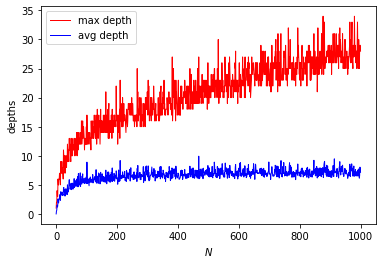

In [100]:
N = [i for i in range(1000)]
import matplotlib.pyplot as plt
plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'avg depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()

This graph shows the logarithmic function that we expected from the theoritical findings. We also see that the average depth goes at a much slower logarithmic rate as compared to the maximum depth.